**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Preprocessing Temporal Vital Data**

In [ ]:
# Read CSV file
vitals = pd.read_csv('v.csv')

In [ ]:
vitals.head()

,icustay_id,hr,heartrate,sysbp,diasbp,meanbp,resprate,spo2,urineoutput
0,200613,1,81.0,135.0,70.0,88.0,20.0,100.0,NaN
1,200613,2,82.0,155.0,70.0,90.0,20.0,100.0,NaN
2,200613,3,90.0,155.0,60.0,83.0,19.0,100.0,200.0
3,200613,4,85.0,166.0,62.0,89.0,20.0,100.0,100.0
4,200613,5,87.0,170.0,64.0,90.0,20.0,100.0,NaN


In [ ]:
vitals.describe()

,icustay_id,hr,heartrate,sysbp,diasbp,meanbp,resprate,spo2,urineoutput
count,18168.000000,18168.000000,16948.000000,16341.000000,16337.000000,16406.000000,16709.000000,16589.000000,12374.000000
mean,271217.737120,12.500000,81.607238,129.616252,63.076479,83.408274,18.621723,97.708168,137.783417
std,27260.449243,6.922377,17.018279,21.296798,13.841087,15.274717,4.981361,3.310994,190.225339
min,200613.000000,1.000000,37.000000,49.000000,10.000000,7.000000,1.000000,14.000000,-3250.000000
25%,260773.000000,6.750000,69.000000,115.000000,54.000000,73.000000,15.000000,97.000000,45.000000
50%,280815.000000,12.500000,80.000000,129.000000,62.000000,82.666702,18.000000,98.500000,90.000000
75%,290512.000000,18.250000,92.000000,144.000000,71.000000,92.000000,21.000000,100.000000,160.000000
max,299973.000000,24.000000,163.750000,251.000000,174.000000,293.000000,65.000000,100.000000,7300.000000


In [ ]:
vitals.shape

(18168, 9)

**Imputation with MICE**

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 48.4 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=cb40d02b0c769105a1a356d46bf651937dd492d44ea9dd15e50c3891459d67f1
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=aa06840383e061da654c1fb141d4ea79eb2ec0713d24cb7ecbae847f26fbb46e
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
!pip install MICE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fancyimpute import IterativeImputer as MICE

In [ ]:
vitals[['heartrate','sysbp',	'diasbp', 'meanbp',	'resprate','spo2','urineoutput']] = MICE().fit_transform(vitals[['heartrate','sysbp',	'diasbp', 'meanbp',	'resprate','spo2','urineoutput']])

In [ ]:
vitals_n = vitals.iloc[:,2:9]
vitals_n.head()

,heartrate,sysbp,diasbp,meanbp,resprate,spo2,urineoutput
0,81.0,135.0,70.0,88.0,20.0,100.0,144.678192
1,82.0,155.0,70.0,90.0,20.0,100.0,140.987100
2,90.0,155.0,60.0,83.0,19.0,100.0,200.000000
3,85.0,166.0,62.0,89.0,20.0,100.0,100.000000
4,87.0,170.0,64.0,90.0,20.0,100.0,132.083648


In [ ]:
vitals_n.shape

(18168, 7)

**Preprocessing with Normalization(MinMaxScaler), Converting into Array**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_scaler = MinMaxScaler()
vitals_n = x_scaler.fit_transform(vitals_n)

In [ ]:
v_array = np.array(vitals_n)

In [ ]:
v_array.shape

(18168, 7)

**Reshaping Temporal Data as LSTM Input**

In [ ]:
time_features = v_array.reshape(-1, 24, 7)

In [ ]:
time_features

In [ ]:
time_features.shape

(757, 24, 7)

**Preparing and Visualizing Output(Mortality)**

In [ ]:
# Read CSV file
m = pd.read_csv('m1.csv')

In [ ]:
m = m.drop_duplicates()

In [ ]:
print('Number of survivors: ' + str(m[m['mortality'] == 0].count()['mortality']))
print('Number of non-survivors: ' + str(m[m['mortality'] == 1].count()['mortality']))
print('Mortality: ' + str(round(100*m[m['mortality'] == 1].sum()['mortality'] / len(m.index.unique()),1)) + '%')

Number of survivors: 450
Number of non-survivors: 307
Mortality: 40.6%


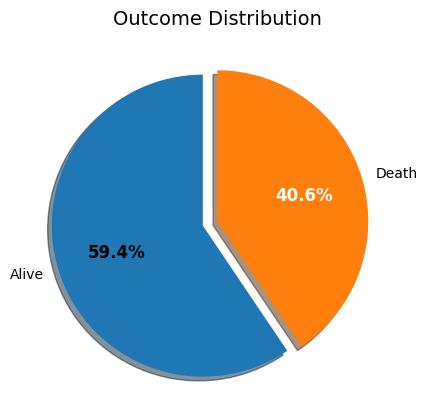

In [ ]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

patches, texts, autotexts = ax.pie(m['mortality'].value_counts(), autopct= '%1.1f%%', shadow=True, 
                                   startangle=90, explode=(0.1, 0), labels=['Alive','Death'])

plt.setp(autotexts, size=12, color = 'black', weight='bold')
autotexts[1].set_color('white');

plt.title('Outcome Distribution', fontsize=14)
plt.show()

In [ ]:
m.head()

,icustay_id,mortality
0,200613,1
1,201171,1
2,201220,1
3,201382,1
4,201829,1


In [ ]:
m = m.mortality
m

0      1
1      1
2      1
3      1
4      1
      ..
752    0
753    0
754    0
755    0
756    1
Name: mortality, Length: 757, dtype: int64

In [ ]:
m.shape

(757,)

In [ ]:
m_array = np.array(m)

In [ ]:
m_array.shape

(757,)

**Preparing Aggregated Data (Static, Demographic, Interventions, Comorbidities, Lab (non tempral))**

In [ ]:
aggregated = pd.read_csv("a_fusion.csv")

In [ ]:
aggregated.describe()

,icustay_id,min tempc,min glucose,min gcs,min gcsmotor,min gcsverbal,min gcseyes,min endotrachflag,min bg_po2,min bg_pco2,...,heart_failure,hypertension,paralysis,diabetes_complicated,metastatic_cancer,obesity,weight_loss,alcohol_abuse,drug_abuse,depression
count,757.000000,750.000000,741.000000,757.000000,757.000000,757.000000,757.000000,757.000000,418.000000,418.000000,...,746.000000,757.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,271217.737120,36.305480,118.807242,12.103038,3.863937,1.405548,1.922061,0.322325,138.511962,34.889952,...,0.152815,0.686922,0.158177,0.033512,0.046917,0.025469,0.046917,0.050938,0.018767,0.064343
std,27277.721943,0.823522,34.707687,3.915774,1.995692,2.036862,1.168593,0.467676,75.963838,7.527557,...,0.360050,0.464052,0.365152,0.180090,0.211603,0.157651,0.211603,0.220019,0.135791,0.245528
min,200613.000000,30.500000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,32.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,260773.000000,35.888888,97.000000,10.000000,1.000000,0.000000,1.000000,0.000000,88.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,280815.000000,36.388889,115.000000,14.000000,4.000000,0.000000,1.000000,0.000000,124.000000,35.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,290512.000000,36.833333,136.000000,15.000000,6.000000,4.000000,3.000000,1.000000,171.000000,39.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,299973.000000,38.700000,268.000000,15.000000,6.000000,5.000000,4.000000,1.000000,514.000000,79.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
aggregated.head()

,icustay_id,min tempc,min glucose,min gcs,min gcsmotor,min gcsverbal,min gcseyes,min endotrachflag,min bg_po2,min bg_pco2,...,heart_failure,hypertension,paralysis,diabetes_complicated,metastatic_cancer,obesity,weight_loss,alcohol_abuse,drug_abuse,depression
0,200613,36.833333,183.0,5,3,0,1,0,154.0,33.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201171,35.444446,134.0,3,1,0,1,0,113.0,27.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201220,36.111111,90.5,15,1,0,1,1,158.0,31.0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,201382,36.777776,156.0,15,2,0,1,1,202.0,42.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201829,36.333333,179.0,3,1,0,1,0,NaN,NaN,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
aggregated.shape

(757, 167)

In [ ]:
aggregated = aggregated.drop_duplicates()

In [ ]:
aggregated.shape

(757, 167)

In [ ]:
aggregated_n = aggregated.drop(['icustay_id'],axis =1)

In [ ]:
# static = static.drop(['stay_id', 'alcohol_abuse', 'obesity', 'hypertension'],axis =1)

In [ ]:
aggregated_n.head() 

,min tempc,min glucose,min gcs,min gcsmotor,min gcsverbal,min gcseyes,min endotrachflag,min bg_po2,min bg_pco2,min bg_pao2fio2ratio,...,heart_failure,hypertension,paralysis,diabetes_complicated,metastatic_cancer,obesity,weight_loss,alcohol_abuse,drug_abuse,depression
0,36.833333,183.0,5,3,0,1,0,154.0,33.0,308.000000,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35.444446,134.0,3,1,0,1,0,113.0,27.0,233.333324,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.111111,90.5,15,1,0,1,1,158.0,31.0,395.000000,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.777776,156.0,15,2,0,1,1,202.0,42.0,504.999993,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36.333333,179.0,3,1,0,1,0,NaN,NaN,NaN,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
aggregated_imp = MICE().fit_transform(aggregated_n)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
aggregated_sc = x_scaler.fit_transform(aggregated_imp)

In [ ]:
aggregated_sc.shape

(757, 161)

In [ ]:
a_array = np.array(aggregated_sc)

In [ ]:
a_array.shape

(757, 161)

**Train-Test Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test,x_train_a, x_test_a = train_test_split(time_features, m_array,a_array, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(605, 24, 7)

In [ ]:
X_test.shape

(152, 24, 7)

In [ ]:
x_train_a.shape

(605, 161)

**FEAS_Fusion Model**

In [ ]:
from tensorflow.keras.layers import Dense,LSTM,Activation,Dropout,BatchNormalization,Input,Embedding,Bidirectional,Reshape,Concatenate, GRU, Input, ZeroPadding2D, Convolution2D, MaxPooling2D
from tensorflow.keras import Sequential, Model

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from typeguard import typechecked

In [ ]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 31.1 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
# timesteps and the number of features
timesteps = 24
temporal_features = 7
output = 1
epochs = 100
batch_size = 32

In [ ]:

LSTM_input = Input(shape=(timesteps,temporal_features))

aggregated_input = Input(shape=(x_train_a.shape[1], ))

# LSTM Layers

# LSTM layer1

LSTM_layer1 = Bidirectional(LSTM(128,kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01), return_sequences=True))(LSTM_input)

LSTM_layer1 = Dropout(0.1)(LSTM_layer1)

# LSTM layer2

LSTM_layer2 = Bidirectional(LSTM(64,kernel_regularizer=regularizers.l2(0.01), recurrent_regularizer=regularizers.l2(0.01) ))(LSTM_layer1)

LSTM_layer2 = Dropout(0.1)(LSTM_layer2)


# Fully Connected Layers

Fc_layer1 = Dense(128,kernel_regularizer=regularizers.l2(0.001), activation='relu')(aggregated_input)
Fc_layer2 = Dense(64,kernel_regularizer=regularizers.l2(0.001), activation='relu')(Fc_layer1)
Fc_layer2 = Dropout(0.1)(Fc_layer2)

# Final layers - LSTM + FC

fina_combined = Concatenate(axis= 1)([Fc_layer2,LSTM_layer2])

final_combined_1 = Dense(64, activation='relu')(fina_combined)

final_output = Dense(output,activation='sigmoid')(final_combined_1)

# Compile Model

model = Model(inputs=[LSTM_input,aggregated_input],outputs=[final_output])

# binary cross entropy loss

#model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

def focal_loss_custom(alpha, gamma):

    # gamma = float(gamma)
    # alpha = float(alpha)

    def binary_focal_loss(y_true, y_pred):
        # """Focal loss for multi-classification
        # FL(p_t)=-alpha(1-p_t)^{gamma}ln(p_t)
        # Notice: y_pred is probability after softmax
        # gradient is d(Fl)/d(p_t) not d(Fl)/d(x) as described in paper
        # d(Fl)/d(p_t) * [p_t(1-p_t)] = d(Fl)/d(x)
        # Focal Loss for Dense Object Detection
        # https://arxiv.org/abs/1708.02002

        # Arguments:
        #     y_true {tensor} -- ground truth labels, shape of [batch_size, num_cls]
        #     y_pred {tensor} -- model's output, shape of [batch_size, num_cls]

        # Keyword Arguments:
        #     gamma {float} -- (default: {2.0})
        #     alpha {float} -- (default: {4.0})

        # Returns:
        #     [tensor] -- loss.
        # """
        fl = tfa.losses.SigmoidFocalCrossEntropy(alpha=alpha, gamma=gamma)
        y_true_K = K.ones_like(y_true)
        focal_loss = fl(y_true, y_pred)
        return focal_loss
    return binary_focal_loss

model.compile(loss=focal_loss_custom(alpha=0.2, gamma=2.0), optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 7)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 161)]        0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, 24, 256)      139264      ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 128)          20736       ['input_2[0][0]']                
                                                                                              

In [ ]:
# fit network

history =  model.fit([X_train, x_train_a], y_train, epochs=epochs, batch_size=batch_size)



Epoch 1/100
19/19 [==============================] - 19s 88ms/step - loss: 7.3820 - accuracy: 0.5934
Epoch 2/100
19/19 [==============================] - 2s 85ms/step - loss: 4.0566 - accuracy: 0.6066
Epoch 3/100
19/19 [==============================] - 2s 86ms/step - loss: 2.1867 - accuracy: 0.6512
Epoch 4/100
19/19 [==============================] - 2s 86ms/step - loss: 1.1781 - accuracy: 0.6512
Epoch 5/100
19/19 [==============================] - 2s 82ms/step - loss: 0.6466 - accuracy: 0.6926
Epoch 6/100
19/19 [==============================] - 2s 84ms/step - loss: 0.3703 - accuracy: 0.7157
Epoch 7/100
19/19 [==============================] - 2s 85ms/step - loss: 0.2314 - accuracy: 0.7008
Epoch 8/100
19/19 [==============================] - 2s 85ms/step - loss: 0.1564 - accuracy: 0.7537
Epoch 9/100
19/19 [==============================] - 2s 87ms/step - loss: 0.1203 - accuracy: 0.7058
Epoch 10/100
19/19 [==============================] - 2s 84ms/step - loss: 0.0981 - accuracy: 0.742

**Evaluating the Model**

In [ ]:
model.evaluate([X_test,x_test_a], y_test, batch_size=batch_size)


5/5 [==============================] - 2s 20ms/step - loss: 0.0603 - accuracy: 0.7763


[0.06028299406170845, 0.7763158082962036]

In [ ]:
y_test_prob = model.predict([X_test,x_test_a], verbose=1)

5/5 [==============================] - 2s 20ms/step


In [ ]:
#y_test_pred = np.where(y_test_prob > 0.28, 1, 0)

In [ ]:
y_test_pred = np.round(y_test_prob)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
con = confusion_matrix(y_test, y_test_pred)
con

array([[80, 10],
       [24, 38]])

Text(51.0, 0.5, 'Actual')

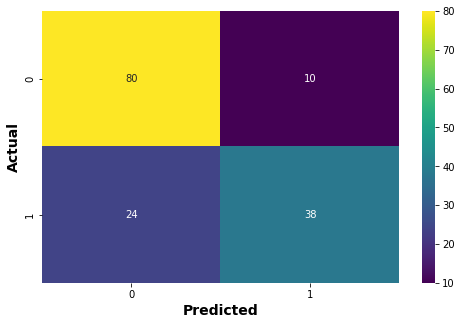

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(con, annot=True, cmap='viridis', fmt='.0f');
plt.xlabel('Predicted', fontsize=14, weight='bold')
plt.ylabel('Actual', fontsize=14, weight='bold')

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        90
           1       0.79      0.61      0.69        62

    accuracy                           0.78       152
   macro avg       0.78      0.75      0.76       152
weighted avg       0.78      0.78      0.77       152



In [ ]:
acc = accuracy_score(y_test, y_test_pred)
acc

0.7763157894736842

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, y_test_prob)

In [ ]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

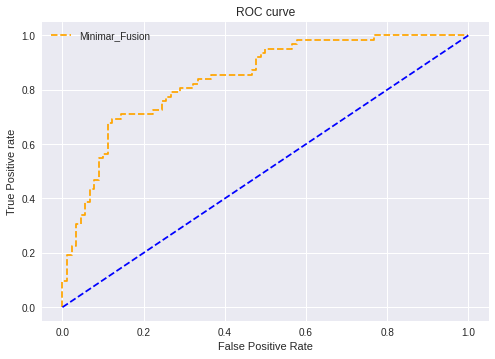

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Minimar_Fusion')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='decision tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
# auc scores
auc_score = roc_auc_score(y_test, y_test_pred)
print(auc_score)

0.7508960573476702
